# A computational introduction to stochastic differential equations.

Lecture 5.

https://github.com/spdes/computational-sde-intro-lecture.

Mean and covariance of linear SDEs.

In [10]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from typing import Tuple

np.random.seed(666)

In [11]:
def discretise_lti_sde(A: np.ndarray, B: np.ndarray, dt: float) -> Tuple[np.ndarray, np.ndarray]:
    """Analytically discretise linear time-invariant SDEs of the form

        dX(t) = A X(t) dt + B dW(t),

    to

        X(t_k) = F(t_k) X(t_{k-1}) + Q(t_k),   Q(t_k) ~ N(0, Cov[X(t_k) | X(t_{k-1})]),

    for any t_k > t_{k-1}. Remark that E[X(t_k) | X(t_{k-1})] = F(t_k) X(t_{k-1}), and that the ODEs that
    govern m(t) and V(t) in the lecture note.

    Arguments
    ---------
    A : np.ndarray (d, d)
        Drift matrix.
    B : np.ndarray (d, w)
        Dispersion matrix.
    dt : float
        Time interval t_{k} - t_{k-1}.

    Returns
    -------
    np.ndarray (d, d), np.ndarray (d, d)
        The transition matrix and the covariance.

    References
    ----------
    Axelsson and Gustafsson. Discrete-time solutions to the continuous-time differential Lyapunov equation with applications to Kalman filtering, 2015.

    Applied stochastic differential equations, 2019, pp. 83
    """
    d = A.shape[0]

    F = scipy.linalg.expm(A * dt)
    phi = np.vstack([np.hstack([A, B @ B.T]), np.hstack([np.zeros_like(A), -A.T])])
    AB = scipy.linalg.expm(phi * dt) @ np.vstack([np.zeros_like(A), np.eye(d)])
    cov = AB[0:d, :] @ F.T
    return F, cov

In [12]:
# SDE coefficients matrices
A = np.array([[0., 1.],
              [0., 0.]])
B = np.array([[0.,],
               [1.]])

In [13]:
# Compute the discrete-time system coefficients
F, cov = discretise_lti_sde(A, B, 0.1)

In [14]:
# Times
# Let us use unevenly placed times not np.linspace
T = 1000
ts = np.sort(np.random.randn(T + 1))
dts = np.diff(ts)

# Trajectory accumulator
samples = np.zeros((T, 2))

# Sample the trajectory by Normal increments
x0 = np.array([0., 0.])
x = x0.copy()
for k in range(T):
    F, cov = discretise_lti_sde(A, B, dts[k])
    x = F @ x + np.linalg.cholesky(cov) @ np.random.randn(2)
    samples[k] = x

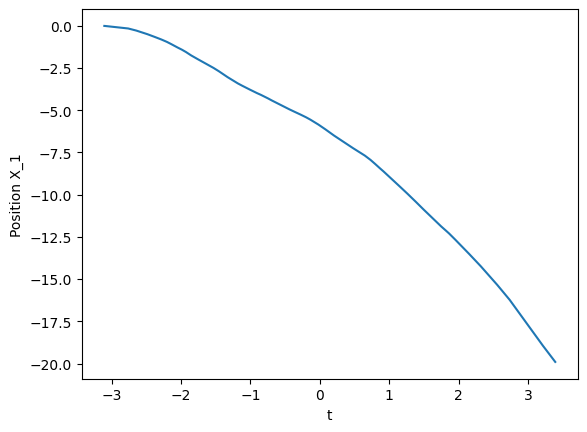

In [18]:
_ = plt.plot(ts[1:], samples[:, 0])
_ = plt.xlabel('t')
_ = plt.ylabel('Position X_1')

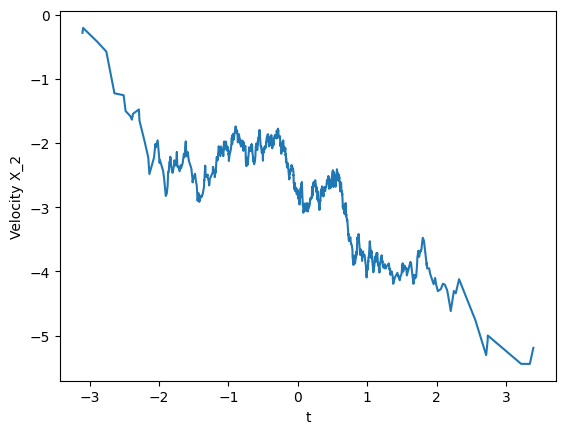

In [19]:
_ = plt.plot(ts[1:], samples[:, 1])
_ = plt.xlabel('t')
_ = plt.ylabel('Velocity X_2')

Does this SDE has a stationary variance? i.e., does the associated Lyapunov equation has a solution?